Every day, the average human heart beats around 100,000 times, pumping 2,000 gallons of blood through the body. Inside your body there are 60,000 miles of blood vessels.
The signs of a woman having a heart attack are much less noticeable than the signs of a male. In women, heart attacks may feel uncomfortable squeezing, pressure, fullness, or pain in the center of the chest. It may also cause pain in one or both arms, the back, neck, jaw or stomach, shortness of breath, nausea and other symptoms. Men experience typical symptoms of heart attack, such as chest pain , discomfort, and stress. They may also experience pain in other areas, such as arms, neck , back, and jaw, and shortness of breath, sweating, and discomfort that mimics heartburn.
It’s a lot of work for an organ which is just like a large fist and weighs between 8 and 12 ounces.

source: healthblog.uofmhealth

# Part 1: EDA
## Dataset Columns: 
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

## 1.1 Loading the modules and dataset


In [38]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


%matplotlib inline
data = pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### 1.2 Handling Missing Data:
let's have a look at the original dataset and see if there is some missing values. If there is any missing values in some patient's record, we will drop the record altogether. Now we can simply drop the rows with missing values and we have a good amount of data. Now we will shuffle the dataset in order to have a uniform distribution when we split them into train and test dataset.

In [39]:
data.dropna(inplace = True)
from sklearn.utils import shuffle
data = shuffle(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 160 to 101
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


As we are now done with handling the missing values, we can simply do a data visualization before we start with machine learning model model.

### 1.3 Age Distribution: 

In [40]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['age'].values , name='Age', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=data[data['sex']=='Male']['age'].values, name ='Male only', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['sex']=='Female']['age'].values, name ='Female only', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'Age Distribution(all)', yaxis_title = 'Age', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

Let's see the histogram of the ages. 

In [41]:
group_labels = ['Age Distribution'] # name of the dataset
fig = ff.create_distplot([data.age], group_labels)
fig.update_layout(title = 'Age Distribution(all)', yaxis_title = 'propotion', xaxis_title = 'Age', title_x = 0.5)
fig.show()

## 1.4 Male and Female Propotion

In [42]:
df=data['sex'].value_counts().reset_index().rename(columns={'index':'sex','sex':'count'})
fig = go.Figure([go.Pie(labels=['Male', 'Female'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Male to Female ratio in the study",title_x=0.5)
fig.show()

## 1.5 Dataset Contributors:
As we already know that the whole dataset is actually an amalgamation of four different independent studies. However, after cleaning, let's have a look at he propotion of the data of different contributors.

In [43]:
df=data['dataset'].value_counts().reset_index().rename(columns={'index':'dataset','dataset':'count'})
fig = go.Figure([go.Pie(labels=df['dataset'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Dataset Contributors",title_x=0.5)
fig.show()

## 1.6 CP(Chest Pain Type) Propotions


In [44]:
df=data['cp'].value_counts().reset_index().rename(columns={'index':'cp','cp':'count'})
fig = go.Figure([go.Pie(labels=df['cp'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Chest Pain Conditions",title_x=0.5)
fig.show()

## 1.7 Resting Blood Pressure vs Gender: 

In [45]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=data[data['sex']=='Male']['trestbps'].values, name ='Male only', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['sex']=='Female']['trestbps'].values, name ='Female only', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

## 1.8 Resting Blood Prssure vs Disease

In [46]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=data[data['num']== 0]['trestbps'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['num'] !=0]['trestbps'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution (at rest)', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

## 1.9 Cholesterol Level Distribution

In [47]:
fig = go.Figure()
fig.add_trace(go.Violin(y=data['chol'].values , name='All Patient', marker_color = 'green'))
fig.add_trace(go.Violin(y=data[data['num']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=data[data['num'] ==4]['chol'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

# Part 2: Classification 

In [48]:
data.head(30)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
160,161,46,Male,Cleveland,atypical angina,101.0,197.0,True,normal,156.0,False,0.0,upsloping,0.0,reversable defect,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
12,13,56,Male,Cleveland,non-anginal,130.0,256.0,True,lv hypertrophy,142.0,True,0.6,flat,1.0,fixed defect,2
54,55,60,Male,Cleveland,asymptomatic,130.0,253.0,False,normal,144.0,True,1.4,upsloping,1.0,reversable defect,1
234,235,54,Female,Cleveland,non-anginal,160.0,201.0,False,normal,163.0,False,0.0,upsloping,1.0,normal,0
31,32,60,Male,Cleveland,asymptomatic,117.0,230.0,True,normal,160.0,True,1.4,upsloping,2.0,reversable defect,2
276,277,66,Female,Cleveland,non-anginal,146.0,278.0,False,lv hypertrophy,152.0,False,0.0,flat,1.0,normal,0
110,111,61,Female,Cleveland,asymptomatic,145.0,307.0,False,lv hypertrophy,146.0,True,1.0,flat,0.0,reversable defect,1
243,244,61,Male,Cleveland,typical angina,134.0,234.0,False,normal,145.0,False,2.6,flat,2.0,normal,2
283,284,35,Male,Cleveland,atypical angina,122.0,192.0,False,normal,174.0,False,0.0,upsloping,0.0,normal,0


## 2.1 Pre-Processing

If we just look at the data, we will see some of the features have categorical values. So we have to do one hot encoding for them. Also the original dataset contains the target as 0, 1, 2, 3, 4. But for identifying simply the presence of disease, we will take binary classification. With that view in mind, we will covert all the target features in the `num` column into 1/0. 

In [49]:
# In some of the features, there is space will will create problem later on. 
# So we rename those attributes to handle problems in the future.

# data["restecg"].replace({"lv hypertrophy": "lv_hypertrophy","st-t abnormality": "stt_abnormality" }, inplace=True)
data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = data[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((data['num'] > 0)*1).copy()
data_tmp['sex'] = (data['sex'] == 'Male')*1
data_tmp['fbs'] = (data['fbs'])*1
data_tmp['exang'] = (data['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
160,46,1,atypical_angina,101.0,197.0,1,156.0,0,0.0,upsloping,0.0,reversable_defect,0
4,41,0,atypical_angina,130.0,204.0,0,172.0,0,1.4,upsloping,0.0,normal,0
12,56,1,non-anginal,130.0,256.0,1,142.0,1,0.6,flat,1.0,fixed_defect,1
54,60,1,asymptomatic,130.0,253.0,0,144.0,1,1.4,upsloping,1.0,reversable_defect,1
234,54,0,non-anginal,160.0,201.0,0,163.0,0,0.0,upsloping,1.0,normal,0
31,60,1,asymptomatic,117.0,230.0,1,160.0,1,1.4,upsloping,2.0,reversable_defect,1
276,66,0,non-anginal,146.0,278.0,0,152.0,0,0.0,flat,1.0,normal,0
110,61,0,asymptomatic,145.0,307.0,0,146.0,1,1.0,flat,0.0,reversable_defect,1
243,61,1,typical_angina,134.0,234.0,0,145.0,0,2.6,flat,2.0,normal,1
283,35,1,atypical_angina,122.0,192.0,0,174.0,0,0.0,upsloping,0.0,normal,0


## 2.2 One-hot Encoding

In [50]:
data = pd.get_dummies(data_tmp, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'fasting_blood_sugar_0',
       'fasting_blood_sugar_1', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_type_downsloping',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_fixed_defect', 'thalassemia_type_normal',
       'thalassemia_type_reversable_defect'],
      dtype='object')

## 2.3.1 Gathering Data
let us separate the input and labels for the dataset and thus we will be able to put them in the training models. 


In [51]:
from sklearn.model_selection import train_test_split
np.random.seed(112)
y = data['target']
X = data.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (239, 21)
Shape of y_train: (239,)
Shape of X_test: (60, 21)
Shape of y_test: (60,)


### 2.3.3. Normalization
Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases.  Normalization is done by the following formula. 
$$ x_{scaled} = \frac{(x - x_{min})}{(x_{max}-x_{min})}$$

In [52]:
# normalize x_train and x_test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.3.4 Fitting Into the Classification Models

#### XGBoost Classifier

In [53]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 1237)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1237)

#### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

#### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2,random_state=7)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=7)

### 2.3.5 Prediction

#### Prediction for XGBoost Classifier

In [57]:
y_pred_xgb = model.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred_xgb):
    actual.append(i)
    predcition.append(j)
    
dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,    mode='markers',  name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred_xgb,  mode='markers',  name='Pred'))

#### Prediction for Decision Tree Classifier

In [58]:
y_pred_dtc = dtc.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred_dtc):
    actual.append(i)
    predcition.append(j)
    
dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,    mode='markers',  name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred_dtc,  mode='markers',  name='Pred'))

#### Prediction for Random Forest Classifier

In [59]:
y_pred_rfc = rfc.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred_rfc):
    actual.append(i)
    predcition.append(j)
    
dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,    mode='markers',  name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred_rfc,  mode='markers',  name='Pred'))

#### Prediction for Logistic Regression

In [60]:
y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
    actual.append(i)
    predcition.append(j)
    
dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,    mode='markers',  name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,  mode='markers',  name='Pred'))

In the above figure, the red dots represent the predicted values that is either 0 or 1 and the blue line & and dot represents the actual value of that particular patient. In the places where the red dot and blue dot do not overlap are the wrong predictions and where the both dots overlap those are the right predicted values.

### 2.3.6 Model Evaluation
#### 2.3.6.1 Accuracy

In [61]:
from sklearn.metrics import accuracy_score
print("Accuracy of XGBoost Classifier is: %.2f%%" % (accuracy_score(y_test, y_pred_xgb) * 100.0))

Accuracy of XGBoost Classifier is: 90.00%


In [62]:
from sklearn.metrics import accuracy_score
print("Accuracy of Decision Tree Classifier is: %.2f%%" % (accuracy_score(y_test, y_pred_dtc) * 100.0))

Accuracy of Decision Tree Classifier is: 78.33%


In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy of Random Forest Classifier is: %.2f%%" % (accuracy_score(y_test, y_pred_rfc) * 100.0))

Accuracy of Random Forest Classifier is: 88.33%


In [64]:
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression is: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))

Accuracy of Logistic Regression is: 91.67%


#### 2.3.6.2 Precision, Recall, F1-Score, Support

##### XGBoost Classifier

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        30
           1       0.90      0.90      0.90        30

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



##### Decision Tree Classifier

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.79      0.77      0.78        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



##### Random Forest Classifier

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.88        30

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



##### Logistic Regression

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        30
           1       0.90      0.93      0.92        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



#### 2.3.6.3 Confusion Matrix

##### XGBoost Classifier

[[27  3]
 [ 3 27]]


<AxesSubplot:>

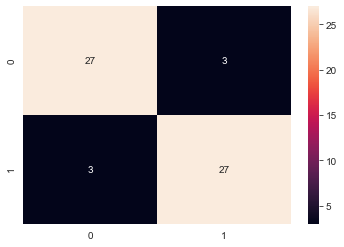

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_xgb))
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True)

##### Decision Tree Classifier

[[24  6]
 [ 7 23]]


<AxesSubplot:>

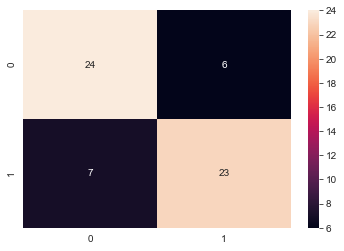

In [70]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_dtc))
sns.heatmap(confusion_matrix(y_test,y_pred_dtc),annot=True)

##### Random Forest Classifier

[[27  3]
 [ 4 26]]


<AxesSubplot:>

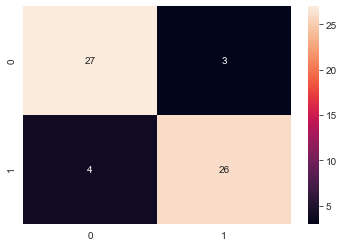

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_rfc))
sns.heatmap(confusion_matrix(y_test,y_pred_rfc),annot=True)

##### Logistic Regression

[[27  3]
 [ 2 28]]


<AxesSubplot:>

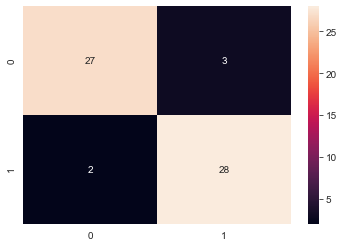

In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

![](https://miro.medium.com/max/356/1*gdIoF8dsWv3dbKSeHLZy_A.png)

### 2.3.7 Comparison of model accuracies

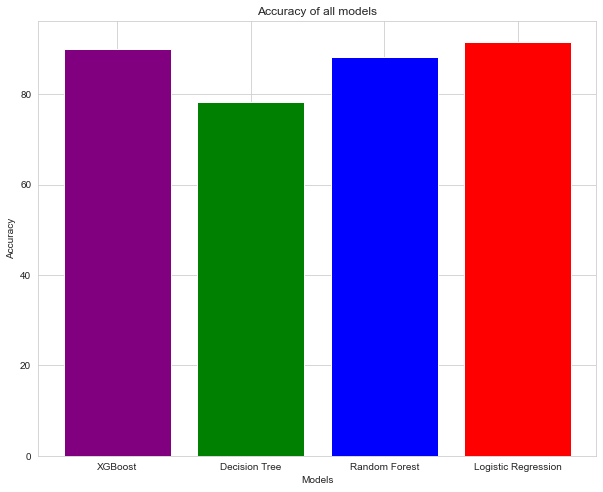

In [73]:
# bar plot with different colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.bar(['XGBoost','Decision Tree','Random Forest','Logistic Regression'],[accuracy_score(y_test, y_pred_xgb) * 100.0,accuracy_score(y_test, y_pred_dtc) * 100.0,accuracy_score(y_test, y_pred_rfc) * 100.0,accuracy_score(y_test, y_pred) * 100.0],color=['purple','green','blue','red'])
plt.title('Accuracy of all models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Part 3: Analysis
## 3.1 Co-efficents: 
Linear Regression actually calculates the total outcome by summing up the weighted sum of the different features. Let's have a look at those weights. 

In [74]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[-2.09562601]


,Coeffecient
num_major_vessels,2.259950
chest_pain_type_asymptomatic,1.166729
st_depression,1.037765
sex,1.035298
resting_blood_pressure,1.006754
thalassemia_type_reversable_defect,0.674746
st_slope_type_flat,0.584827
exercise_induced_angina_1,0.348219
cholesterol,0.342257
age,0.193790


<Figure size 720x864 with 0 Axes>

# 4. Conclusion
* The XGBoost classifier had an accuracy of 90%.
* The Decision Tree Classifier had an accuracy of 78.33%.
* The Random Forest Classifier had an accuracy of 88.33%.
* The Logistic Regression model predicted with 91.67% accuracy. The model is more specific than sensitive.
* According to the Logistic Regression model the major features contributing in precision of predicting model are shown in the heatmap in Ascending order.
